In [1]:
import pandas as pd

# 1.	(Figure 1, 35 points) Load the housing_price.csv file and create the following map visualization with Folium.

In [2]:
housing = pd.read_csv('housing_price.csv')
housing.head(2)

,housenum,acre,acregroup,adj1998,adj2007,adj2011,bedgroup,bedrooms,bikescore,diff2014,...,price1998,price2007,price2011,price2014,sfgroup,squarefeet,streetname,streetno,walkscore,zip
0,1,0.28,> 1/4 acre,148.3626,233.8419,191.8211,3 beds,3,35,62.36645,...,101.5,203.5,181.1,210.729,<= 1500 sf,0.966,Acrebrook Drive,406,9,1062
1,2,0.29,> 1/4 acre,135.2073,261.4203,206.9677,3 beds,3,44,68.96375,...,92.5,227.5,195.4,204.171,<= 1500 sf,0.960,Autumn Dr,57,5,1062


# a.	The housing_price.csv spreadsheet include four columns: latitude, longitude, streetname, streetno, and price2014.
b.	Place markers on a base map (OpenStreetMap). Each marker represents one house based on its latitude and longitude. Each marker should be a circle filled with red color and with a black line. 
c.	When the mouse cursor hovers over a marker, the streetno and streetname, and price2014 should be displayed in a tooltip. 
d.	Write your code in Jupyter Notebook. Submit the Jupyter Notebook and the map either as picture or a PDF file. 



In [3]:
import folium
m = folium.Map(location=[20,0], zoom_start=2)


In [4]:
housing.dtypes
housingno = housing['streetno'].astype(str)
housingprice = housing['price2014'].astype(str)

In [5]:
name = housingno+' '+housing['streetname']+' '+housingprice
housing['name']=name
housing.head(2)

,housenum,acre,acregroup,adj1998,adj2007,adj2011,bedgroup,bedrooms,bikescore,diff2014,...,price2007,price2011,price2014,sfgroup,squarefeet,streetname,streetno,walkscore,zip,name
0,1,0.28,> 1/4 acre,148.3626,233.8419,191.8211,3 beds,3,35,62.36645,...,203.5,181.1,210.729,<= 1500 sf,0.966,Acrebrook Drive,406,9,1062,406 Acrebrook Drive 210.729
1,2,0.29,> 1/4 acre,135.2073,261.4203,206.9677,3 beds,3,44,68.96375,...,227.5,195.4,204.171,<= 1500 sf,0.960,Autumn Dr,57,5,1062,57 Autumn Dr 204.171


In [6]:
for lat,lon,name in zip(housing['latitude'],housing['longitude'],housing['name']): 
    folium.Marker(location=[lat,lon],tooltip = name,icon= folium.Icon(color='red'), 
                  icon_color='black').add_to(m) 

In [7]:
m

# 2.	(Figure 2, 30 points) Create a network visualization of the 2019 Women’s World Cup Bracket using python-graphviz.
a.	Here are some examples for your reference. You do not have to follow these formats.  
i.	https://www.fifa.com/womensworldcup/matches/
ii.	http://www.espn.com/soccer/bracket/_/league/fifa.wwc
b.	Each node should contain the names of the countries and the score. National flags are optional. 
c.	This must be a directional graph. There must be edges with arrows pointing from one stage to the next. 
d.	Submit the Jupyter Notebook and the bracket either as an image or a PDF file.



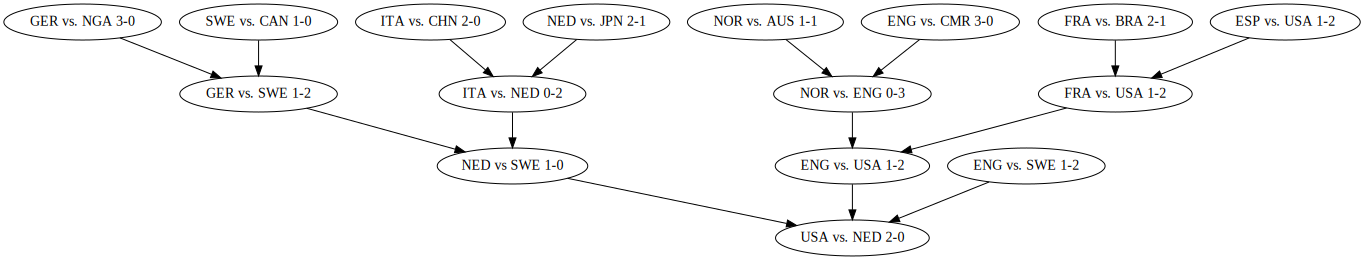

In [8]:
import graphviz

d = graphviz.Digraph(name='WorldCup')
d.node("NOR vs. AUS 1-1")
d.node("ENG vs. CMR 3-0")
d.node("FRA vs. BRA 2-1")
d.node("ESP vs. USA 1-2")

q1 = graphviz.Digraph(name='q1')
q1.node('NOR vs. ENG 0-3')
q1.node('FRA vs. USA 1-2')

f = graphviz.Digraph(name='final')
f.node('ENG vs. USA 1-2')
f.node('NED vs SWE 1-0')

q2 = graphviz.Digraph(name='q2')
q1.node('ITA vs. NED 0-2')
q1.node('GER vs. SWE 1-2')

q3 = graphviz.Digraph(name='q3')
d.node("ITA vs. CHN 2-0")
d.node("NED vs. JPN 2-1")
d.node("GER vs. NGA 3-0")
d.node("SWE vs. CAN 1-0")

ff = graphviz.Digraph(name='finalFinal')
ff.node('USA vs. NED 2-0')
ff.node('ENG vs. SWE 1-2')

d.edge("NOR vs. AUS 1-1", "NOR vs. ENG 0-3")
d.edge("ENG vs. CMR 3-0", "NOR vs. ENG 0-3")

d.edge("FRA vs. BRA 2-1", "FRA vs. USA 1-2")
d.edge("ESP vs. USA 1-2", "FRA vs. USA 1-2")

d.edge("NOR vs. ENG 0-3", "ENG vs. USA 1-2")
d.edge("FRA vs. USA 1-2", "ENG vs. USA 1-2")

d.edge("ITA vs. CHN 2-0", "ITA vs. NED 0-2")
d.edge("NED vs. JPN 2-1", "ITA vs. NED 0-2")

d.edge("GER vs. NGA 3-0", "GER vs. SWE 1-2")
d.edge("SWE vs. CAN 1-0", "GER vs. SWE 1-2")

d.edge("ITA vs. NED 0-2", "NED vs SWE 1-0")
d.edge("GER vs. SWE 1-2", "NED vs SWE 1-0")

d.edge("NED vs SWE 1-0", "USA vs. NED 2-0")
d.edge("ENG vs. USA 1-2", "USA vs. NED 2-0")

d.edge("ENG vs. SWE 1-2", "USA vs. NED 2-0")

d

# 3.	(Figure 3, 35 points) Create a music collaboration network visualization using NetworkX and Plotly.   
a.	Select 10 singers/musicians. For each musician, identify at least two collaborators and the songs they collaborated on. The more artists you include in your visualization the better. 
i.	For example, Drake collaborated with Rihanna on “Work” and “What’s My Name?”, with Lil Wayne on “She Will”, etc. 
b.	Create a network visualization of the collaborations. 
i.	Each node represents a musician with the name of the musician displayed. 
ii.	Each edge represents a collaboration between two musicians. The name of the song should be displayed next to the edge.  
iii.	If more than two musicians collaborated in a project, each musician should be connected to every other musician. 
iv.	If two musicians collaborated more than once, create multiple edges between them.  
v.	Pictures are optional. 
vi.	Here is an example of Jazz music collaboration network visualization: https://linkedjazz.org/network/
c.	Create THREE visualizations with three different layout algorithms. 
i.	Some layout may not look good. It’s OK. The goal is to let you experiment with different layouts and learn how to adjust layout parameters.  
d.	You can choose the style of the visualization. 
e.	You decide how to handle the data. You may hard code the data in the Python program or create a spreadsheet and load it into your program. 
i.	If you use a spreadsheet, make sure you submit the spreadsheet with your code and PDF file. 
f.	You can find musicians, songs, and their collaborators at https://www.billboard.com/charts/artist-100. Click on an artist and look at his/her Chart History. Or use your own source of information. 
g.	Visualize your network with Plotly. 
h.	Write your code in Jupyter Notebook. Submit the Jupyter Notebook and the rendered network as an image or a PDF file.


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
MG = nx.MultiGraph(name='Pop')

MG.add_node('Rihanna')
MG.add_node('Drake')
MG.add_node('Eminem')
MG.add_node('JAY-Z')
MG.add_node('Kanye West')
MG.add_node('Nicki Minaj')
MG.add_node('Chris Brown')
MG.add_node('Sean Paul')
MG.add_node('TI')
MG.add_node('Asap Rocky')

MG.add_node('Song: Umbrella')
MG.add_node('Song: Fly')
MG.add_node('Song: Live Your Life')
MG.add_node('Song: All of the Lights')
MG.add_node('Song: Run This Town')
MG.add_node('Song: Love the Way You Lie')
MG.add_node('Song: Whats My Name')
MG.add_node('Song: Cockiness')
MG.add_node('Song: Break It Off')
MG.add_node('Song: Disturbia')

MG.add_edge('Rihanna', 'Song: Umbrella')
MG.add_edge('JAY-Z', 'Song: Umbrella')

MG.add_edge('Rihanna', 'Song: Fly')
MG.add_edge('Nicki Minaj', 'Song: Fly')

MG.add_edge('Rihanna', 'Song: Live Your Life')
MG.add_edge('TI', 'Song: Live Your Life')

MG.add_edge('Rihanna', 'Song: All of the Lights')
MG.add_edge('Kanye West', 'Song: All of the Lights')

MG.add_edge('Rihanna', 'Song: Run This Town')
MG.add_edge('JAY-Z', 'Song: Run This Town')

MG.add_edge('Rihanna', 'Song: Love the Way You Lie')
MG.add_edge('Eminem', 'Song: Love the Way You Lie')

MG.add_edge('Rihanna', 'Song: Whats My Name')
MG.add_edge('Drake', 'Song: Whats My Name')

MG.add_edge('Rihanna', 'Song: Cockiness')
MG.add_edge('Asap Rocky', 'Song: Cockiness')

MG.add_edge('Rihanna', 'Song: Break It Off')
MG.add_edge('Sean Paul', 'Song: Break It Off')
MG.add_edge('Rihanna', 'Song: Disturbia')
MG.add_edge('Chris Brown', 'Song: Disturbia')
nx.draw(MG, with_labels=True)

C:\Users\Juney\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


C:\Users\Juney\Anaconda3\lib\site-packages\networkx\drawing\layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


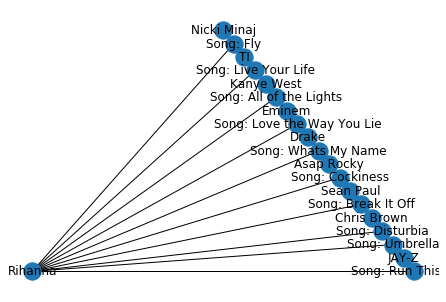

In [10]:
MG2 = nx.MultiGraph(name='Pop')

MG2.add_node('Rihanna')
MG2.add_node('Drake')
MG2.add_node('Eminem')
MG2.add_node('JAY-Z')
MG2.add_node('Kanye West')
MG2.add_node('Nicki Minaj')
MG2.add_node('Chris Brown')
MG2.add_node('Sean Paul')
MG2.add_node('TI')
MG2.add_node('Asap Rocky')

MG2.add_node('Song: Umbrella')
MG2.add_node('Song: Fly')
MG2.add_node('Song: Live Your Life')
MG2.add_node('Song: All of the Lights')
MG2.add_node('Song: Run This Town')
MG2.add_node('Song: Love the Way You Lie')
MG2.add_node('Song: Whats My Name')
MG2.add_node('Song: Cockiness')
MG2.add_node('Song: Break It Off')
MG2.add_node('Song: Disturbia')

MG2.add_edge('Rihanna', 'Song: Umbrella')
MG2.add_edge('JAY-Z', 'Song: Umbrella')

MG2.add_edge('Rihanna', 'Song: Fly')
MG2.add_edge('Nicki Minaj', 'Song: Fly')

MG2.add_edge('Rihanna', 'Song: Live Your Life')
MG2.add_edge('TI', 'Song: Live Your Life')

MG2.add_edge('Rihanna', 'Song: All of the Lights')
MG2.add_edge('Kanye West', 'Song: All of the Lights')

MG2.add_edge('Rihanna', 'Song: Run This Town')
MG2.add_edge('JAY-Z', 'Song: Run This Town')

MG2.add_edge('Rihanna', 'Song: Love the Way You Lie')
MG2.add_edge('Eminem', 'Song: Love the Way You Lie')

MG2.add_edge('Rihanna', 'Song: Whats My Name')
MG2.add_edge('Drake', 'Song: Whats My Name')

MG2.add_edge('Rihanna', 'Song: Cockiness')
MG2.add_edge('Asap Rocky', 'Song: Cockiness')

MG2.add_edge('Rihanna', 'Song: Break It Off')
MG2.add_edge('Sean Paul', 'Song: Break It Off')
MG2.add_edge('Rihanna', 'Song: Disturbia')
MG2.add_edge('Chris Brown', 'Song: Disturbia')
nx.draw_planar(MG, with_labels=True)

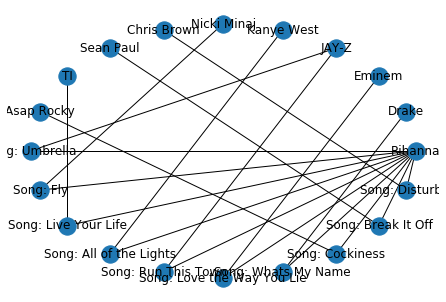

In [11]:
MG3 = nx.MultiGraph(name='Pop')

MG3.add_node('Rihanna')
MG3.add_node('Drake')
MG3.add_node('Eminem')
MG3.add_node('JAY-Z')
MG3.add_node('Kanye West')
MG3.add_node('Nicki Minaj')
MG3.add_node('Chris Brown')
MG3.add_node('Sean Paul')
MG3.add_node('TI')
MG3.add_node('Asap Rocky')

MG3.add_node('Song: Umbrella')
MG3.add_node('Song: Fly')
MG3.add_node('Song: Live Your Life')
MG3.add_node('Song: All of the Lights')
MG3.add_node('Song: Run This Town')
MG3.add_node('Song: Love the Way You Lie')
MG3.add_node('Song: Whats My Name')
MG3.add_node('Song: Cockiness')
MG3.add_node('Song: Break It Off')
MG3.add_node('Song: Disturbia')

MG3.add_edge('Rihanna', 'Song: Umbrella')
MG3.add_edge('JAY-Z', 'Song: Umbrella')

MG3.add_edge('Rihanna', 'Song: Fly')
MG3.add_edge('Nicki Minaj', 'Song: Fly')

MG3.add_edge('Rihanna', 'Song: Live Your Life')
MG3.add_edge('TI', 'Song: Live Your Life')

MG3.add_edge('Rihanna', 'Song: All of the Lights')
MG3.add_edge('Kanye West', 'Song: All of the Lights')

MG3.add_edge('Rihanna', 'Song: Run This Town')
MG3.add_edge('JAY-Z', 'Song: Run This Town')

MG3.add_edge('Rihanna', 'Song: Love the Way You Lie')
MG3.add_edge('Eminem', 'Song: Love the Way You Lie')

MG3.add_edge('Rihanna', 'Song: Whats My Name')
MG3.add_edge('Drake', 'Song: Whats My Name')

MG3.add_edge('Rihanna', 'Song: Cockiness')
MG3.add_edge('Asap Rocky', 'Song: Cockiness')

MG3.add_edge('Rihanna', 'Song: Break It Off')
MG3.add_edge('Sean Paul', 'Song: Break It Off')
MG3.add_edge('Rihanna', 'Song: Disturbia')
MG3.add_edge('Chris Brown', 'Song: Disturbia')
nx.draw_circular(MG, with_labels=True)

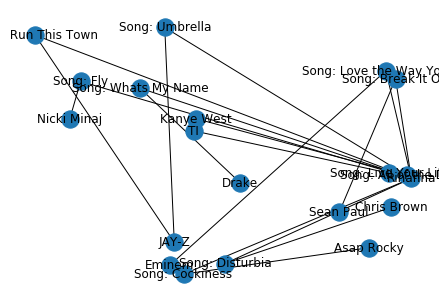

In [13]:
MG4 = nx.MultiGraph(name='Pop')

MG4.add_node('Rihanna')
MG4.add_node('Drake')
MG4.add_node('Eminem')
MG4.add_node('JAY-Z')
MG4.add_node('Kanye West')
MG4.add_node('Nicki Minaj')
MG4.add_node('Chris Brown')
MG4.add_node('Sean Paul')
MG4.add_node('TI')
MG4.add_node('Asap Rocky')

MG4.add_node('Song: Umbrella')
MG4.add_node('Song: Fly')
MG4.add_node('Song: Live Your Life')
MG4.add_node('Song: All of the Lights')
MG4.add_node('Song: Run This Town')
MG4.add_node('Song: Love the Way You Lie')
MG4.add_node('Song: Whats My Name')
MG4.add_node('Song: Cockiness')
MG4.add_node('Song: Break It Off')
MG4.add_node('Song: Disturbia')

MG4.add_edge('Rihanna', 'Song: Umbrella')
MG4.add_edge('JAY-Z', 'Song: Umbrella')

MG4.add_edge('Rihanna', 'Song: Fly')
MG4.add_edge('Nicki Minaj', 'Song: Fly')

MG4.add_edge('Rihanna', 'Song: Live Your Life')
MG4.add_edge('TI', 'Song: Live Your Life')

MG4.add_edge('Rihanna', 'Song: All of the Lights')
MG4.add_edge('Kanye West', 'Song: All of the Lights')

MG4.add_edge('Rihanna', 'Song: Run This Town')
MG4.add_edge('JAY-Z', 'Song: Run This Town')

MG4.add_edge('Rihanna', 'Song: Love the Way You Lie')
MG4.add_edge('Eminem', 'Song: Love the Way You Lie')

MG4.add_edge('Rihanna', 'Song: Whats My Name')
MG4.add_edge('Drake', 'Song: Whats My Name')

MG4.add_edge('Rihanna', 'Song: Cockiness')
MG4.add_edge('Asap Rocky', 'Song: Cockiness')

MG4.add_edge('Rihanna', 'Song: Break It Off')
MG4.add_edge('Sean Paul', 'Song: Break It Off')
MG4.add_edge('Rihanna', 'Song: Disturbia')
MG4.add_edge('Chris Brown', 'Song: Disturbia')
nx.draw_random(MG, with_labels=True)